In [33]:
import numpy as np
import pymannkendall as mk
import pandas as pd
import glob,os

In [34]:
df_summary = pd.read_csv('2group_summary.csv')

In [35]:
print(df_summary)

      begin  end  s1_er_ratio  s2_er_ratio  er_ratio_average      file
0         0   50     0.335079     0.344828          0.340956  SUEL.tsv
1        50  100     0.227513     0.343434          0.267361  SUEL.tsv
2       100  150     0.259259     0.259740          0.259366  SUEL.tsv
3       150  200     0.131148     0.357513          0.269841  SUEL.tsv
4       200  250     0.455357     0.382530          0.400901  SUEL.tsv
...     ...  ...          ...          ...               ...       ...
9058    200  250     0.400568     0.613990          0.512195  SPXX.tsv
9059    250  300     0.396226     0.506224          0.436090  SPXX.tsv
9060    300  350     0.381323     0.460358          0.429012  SPXX.tsv
9061    350  400     0.500000     0.441527          0.466113  SPXX.tsv
9062    400  414     0.204918     0.382353          0.243590  SPXX.tsv

[9063 rows x 6 columns]


In [36]:
import seaborn as sns

for i in range(0, len(df_summary)):
    if df_summary['end'].iloc[i]%50!=0:
        df_summary['er_ratio_average'].iloc[i] = None

df_summary = df_summary.dropna()
print(df_summary.head())

   begin  end  s1_er_ratio  s2_er_ratio  er_ratio_average      file
0      0   50     0.335079     0.344828          0.340956  SUEL.tsv
1     50  100     0.227513     0.343434          0.267361  SUEL.tsv
2    100  150     0.259259     0.259740          0.259366  SUEL.tsv
3    150  200     0.131148     0.357513          0.269841  SUEL.tsv
4    200  250     0.455357     0.382530          0.400901  SUEL.tsv


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


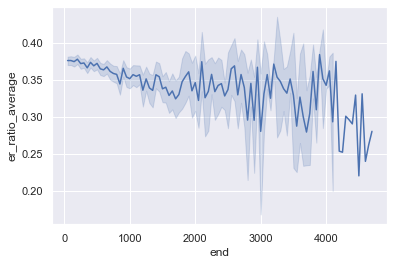

In [37]:
sns.set_theme(style="darkgrid")
sns.lineplot(x=df_summary['end'], y=df_summary['er_ratio_average'])

In [26]:
for i in range(0, len(df_summary)):
    if df_summary['end'].iloc[i]%50!=0:
        df_summary['er_ratio_average'].iloc[i] = None

df_summary = df_summary.dropna()

grouped_df = df_summary.groupby("end")
mean_df = grouped_df['er_ratio_average'].mean()

mean_df = mean_df.reset_index()
print(mean_df)

     end  er_ratio_average
0     50          0.376138
1    100          0.376192
2    150          0.374699
3    200          0.377986
4    250          0.372059
..   ...               ...
89  4500          0.219941
90  4550          0.331081
91  4600          0.239583
92  4650          0.261905
93  4700          0.280255

[94 rows x 2 columns]


In [27]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Average ER ratio')

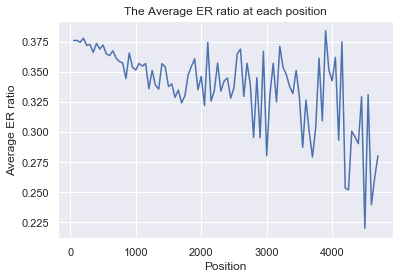

In [28]:
l1=plt.plot(mean_df['end'],mean_df['er_ratio_average'],label='type1')
plt.title('The Average ER ratio at each position')
plt.xlabel('Position')
plt.ylabel('Average ER ratio')

In [29]:
plt.show()

In [30]:
er_file = glob.glob("S***.csv")

In [31]:
dl_er = []
out = []
for f in er_file:
    dl_er.append(pd.read_csv(f))

for x in dl_er:
    if len(x)>8:
        x = x.drop(index=[len(x)-1])
        out.append(mk.original_test(x['er_ratio_average']))

In [32]:
print(len(dl_er))
print(len(out))
c = 0
for o in out:
    if o.trend == "decreasing":
        c = c+1
print(c)
print(310/412)

622
412
20
0.7524271844660194


In [19]:
df = pd.concat(dl_er)
df.to_csv('2group_summary.csv', index = False)

NameError: name 'df' is not defined

In [10]:
dl_er2 = []
for q in dl_er:
    if len(q)>16 and len(q)<24:
        dl_er2.append(q)
df2 = pd.concat(dl_er2)
df2.to_csv('2group_2.csv', index = False)

In [6]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [7]:
glm_binom = sm.GLM(df['end'], df['er_ratio_average'], family=sm.families.Binomial())

In [9]:
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    end   No. Observations:                 9063
Model:                            GLM   Df Residuals:                     9062
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Apr 2021   Deviance:                   4.7397e+08
Time:                        01:48:40   Pearson chi2:                 2.99e+25
No. Iterations:                     2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
er_ratio_average  6.545e+18   1.08e+06  

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:946: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:946: RuntimeWarning: invalid value encountered in add
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:947: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights


In [11]:
print(len(dl_er))

622
